# Implementing Naive Bayes on dataset

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
 

# Plot label distribution
import matplotlib.pyplot as plot
import seaborn as sns

#Load Singfake dataset 
dataset = pd.read_csv("singfake_eda.csv")

#display few rows
display(dataset.head(50))

# Check for missing values
print("Missing values:\n", dataset.isnull().sum())

# get summary
print("\nDataset summary:\n", dataset.describe())

# Display unique values in the bonafide_or_spoof column
print("\nUnique labels:", dataset['bonafide_or_spoof'].unique())

# Display basic dataset information
print("\nData Info:")
print(dataset.info())



,set,bonafide_or_spoof,language,singer,title,url,views,likes,comments
0,Training,0,Mandarin,Stefanie_Sun,尚好的青春-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=19,3335891,28129,1038
1,Training,0,Mandarin,Hebe_Tien,【首播】田馥甄 - 灵魂伴侣 - 官方MV,https://www.bilibili.com/video/BV18s411k7K3/?s...,152316,1329,173
2,T01,0,Mandarin,Stefanie_Sun,【私藏馆】孙燕姿《遇见》爆火神曲！祝大家节日快乐！,https://www.bilibili.com/video/BV1Q44y1M7bB/?s...,7920420,132851,3827
3,Training,0,Mandarin,Mayday,Mayday五月天【星空】MV官方完整版-電影「星空」主題曲,https://www.youtube.com/watch?v=RTUwaCImChM,44845261,112283,4765
4,Training,0,Mandarin,Stefanie_Sun,害怕-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=...,3335894,28129,1038
5,T02,0,Mandarin,Teresa_Teng,邓丽君演唱《红豆》歌声悠扬，经典动听，让人回味无穷,https://www.bilibili.com/video/BV1LV4y1P7yJ/?s...,6106,28,10
6,Training,0,Mandarin,Hebe_Tien,【田馥甄】终身大事-2014 Live「2GETHER 4EVER ENCORE影音館」,https://www.bilibili.com/video/BV1os411B7NN/?s...,50649,590,67
7,Training,0,Mandarin,Hebe_Tien,田馥甄 - 要死就一定要死在你手里【梦想的声音】,https://www.bilibili.com/video/BV1Wx411n74G/?s...,166100,919,107
8,Training,0,Mandarin,Jay_Chou,周杰倫 Jay Chou【浪漫手機 Romantic Cellphone】-Official...,https://www.youtube.com/watch?v=Kbvu9Vt5_eE&li...,7256658,27676,2060
9,Training,0,Mandarin,Hebe_Tien,还是要幸福,https://www.bilibili.com/video/BV1ja4y147Wr?p=11,12402,92,4


Missing values:
 set                  0
bonafide_or_spoof    0
language             0
singer               0
title                0
url                  0
views                0
likes                0
comments             0
dtype: int64

Dataset summary:
        bonafide_or_spoof         views         likes       comments
count        1262.000000  1.262000e+03  1.262000e+03    1262.000000
mean            0.500000  9.952847e+06  4.912885e+04    2012.061014
std             0.500198  1.428803e+08  6.200381e+05   25965.989865
min             0.000000  6.000000e+01  0.000000e+00       0.000000
25%             0.000000  5.320250e+03  7.100000e+01       9.000000
50%             0.500000  2.906000e+04  4.705000e+02      31.000000
75%             1.000000  6.130538e+05  7.578000e+03     254.750000
max             1.000000  3.586216e+09  1.605870e+07  675588.000000

Unique labels: [0 1]

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 9 co

Index(['set', 'bonafide_or_spoof', 'language', 'singer', 'title', 'url',
       'views', 'likes', 'comments'],
      dtype='object')


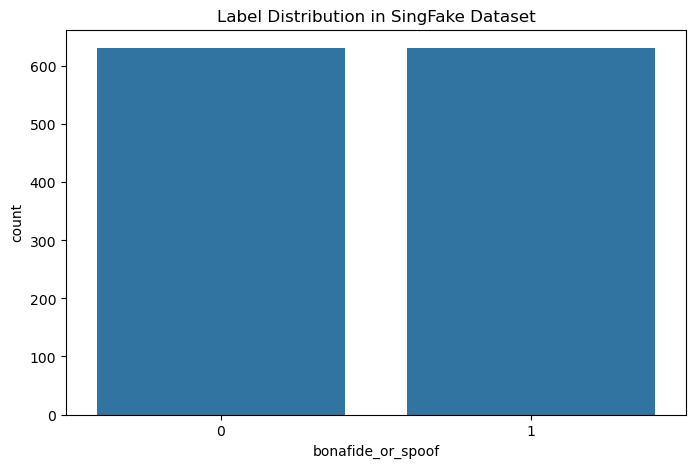


Label Distribution Counts:
 bonafide_or_spoof
0    631
1    631
Name: count, dtype: int64


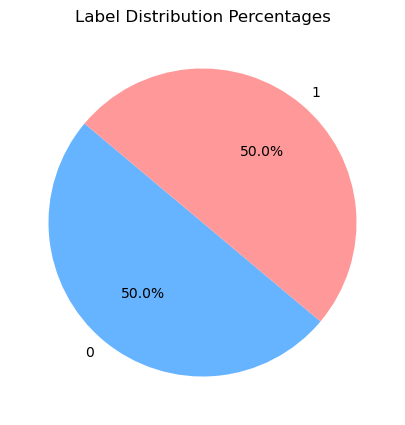

In [59]:
print(dataset.columns)

# Plot label distribution
plot.figure(figsize=(8, 5))
sns.countplot(x='bonafide_or_spoof', data=dataset)
plot.title('Label Distribution in SingFake Dataset')
plot.show()

# Show label distribution counts
label_counts = dataset['bonafide_or_spoof'].value_counts()
print("\nLabel Distribution Counts:\n", label_counts)

# Plot label distribution percentages
plot.figure(figsize=(8, 5))
label_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plot.title('Label Distribution Percentages')
plot.ylabel('')
plot.show()




# Reason for checking Label Distribution
It is beneficial to check how the dataset is organized whether it is one sided or evenly balanced. This helps with preventing bias to one outcome or choice.
In my case, thes singfake_metadata.csv seems to be quite balanced. 

# Therefore, since the dataset seems to be well balanced, the Naive Bayes will have a better foundation to perform without requiring any class balance or adjustments.  

In [85]:
# Drop non-numeric columns to avoid conversion errors
X = dataset.select_dtypes(include=['number']).drop(columns=['bonafide_or_spoof'])
y = dataset['bonafide_or_spoof']

# Prepare data for classification
#X = dataset.drop('label', axis=1)
#y = dataset['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

In [ ]:
# predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
#ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bonafide', 'Spoof']).plot(cmap='Blues')
#plot.title('Confusion Matrix for Naive Bayes Classification')
#plot.show()

# Plot Confusion Matrix
plot.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bonafide', 'Spoof'], yticklabels=['Bonafide', 'Spoof'])
plot.title('Confusion Matrix for Naive Bayes Classification')
plot.xlabel('Predicted label')
plot.ylabel('True label')
plot.show()

# Evaluate model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Average Accuracy:", accuracy)

# classification report
#print(classification_report(y_test, y_pred))

The confusion matrix shows that many bonafide samples are misclassified as spoof (93 out of 138), while almost all spoof samples are correctly identified (115 out of 115). The classification report indicates a high precision for class 0 (bonafide) but poor recall, meaning many bonafide samples are missed. Class 1 (spoof) has strong recall but moderate precision. Overall accuracy is 0.63, and the macro average F1-score is 0.60, suggesting room for improvement in the model, especially for bonafide detection.


The ROC curve shows the trade-off between true positive rate (sensitivity) and false positive rate at various thresholds. The area under the curve (AUC = 0.64) indicates the model has some discrimination ability, but it's not very strong. A perfect model would have an AUC of 1, while a random guess would be 0.5. This suggests that the model needs improvement.

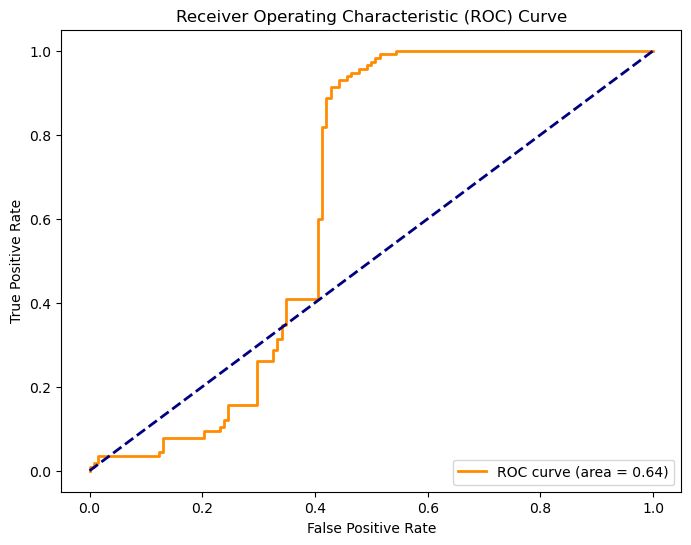

In [75]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plot.figure(figsize=(8, 6))
plot.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver Operating Characteristic (ROC) Curve')
plot.legend(loc='lower right')
plot.show()

This plots the ROC curve and calculates the AUC. The ROC curve (orange line) shows the trade-off between True Positive Rate and False Positive Rate, with an AUC of 0.64 which is cosidered a moderate performance. 

These results indicate that the Naive Bayes model has a moderate discriminative ability, with an ROC and AUC of 0.64, this suggests it performs better than random classification but it still needs improvement. The confusion matrix shows that the spoofed samples are classified well (100% recall for spoofed samples), the model struggles significantly with bonafide samples, resulting in misclassifying a large portion of them as spoofed. This resulted in a overall accuracy of 63%.

The dataset have some underlying challenges such as class imbalance, overlapping feature distributions, or insufficient feature quality. Therefore to improve the model, we can consider things like feature engineering, balancing the dataset, or exploring more complex classifiers like Support Vector Machines or Neural Networks. Fine-tuning hyperparameters and employing cross-validation may help the model enhance performance.
